In [2]:
import pandas as pd


In [10]:
#from google.colab import drive
#drive.mount("/content/drive/")


#myfilename = "/content/drive/MyDrive/Colab Notebooks/MLDM/wineTraining.csv"
#WineData = pd.read_csv(myfilename)
WineData = pd.read_csv('wineTraining.csv')

WineData.head(n=6)
#WineDataQuality = WineData[0:WineData.shape[0]][0:1]
#WineDataQuality = WineData[0:][0:1]
WineDataQuality = WineData['Wine']
print(WineDataQuality)
#WineInput = WineData.loc[:, WineData.columns != 'Wine']


#WineInput : X
#table에서 열의 차례대로 X1,X2,X3...
#w:XTX의 eigenvector(loading vector)
WineInput = WineData.loc[:, ~WineData.columns.isin(['Wine'])]
WineInput

0      1
1      1
2      1
3      1
4      1
      ..
171    3
172    3
173    3
174    3
175    3
Name: Wine, Length: 176, dtype: int64


,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
172,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
173,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
174,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
import numpy as np


In [9]:
#https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
from sklearn.preprocessing import StandardScaler
x = WineInput.values
#x = StandardScaler().fit_transform(x) # normalizing the features
stdscalar = StandardScaler()
stdscalar.fit(x)
x = stdscalar.transform(x)
print( np.mean(x),"    ", np.std(x) )
print(pd.DataFrame(WineInput.values).head())
print(pd.DataFrame(x).head())

print( stdscalar.transform(WineInput.values[0:1]) - x[0:1,])
#print( x[0:1,])

-8.384901165001182e-17      1.0
      0     1     2     3      4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

       12  
0  1065.0  
1  1050.0  
2  1185.0  
3  1480.0  
4   735.0  
         0         1         2         3         4         5         6   \
0  1.517774 -0.559685  0.233940 -1.167670  1.910743  0.820184  1.044971   
1  0.244734 -0.496530 -0.820855 -2.486193  0.013574  0.578980  0.743092   
2  0.195296  0.026759  1.106873 -0.268676  0.083840  0.820184  1.226098   
3  1.690809 -0.343152  0.488545 -0.808072  0.927026  2.508610  1.477664   
4  0.294173  0.234270  1.834317  0.450518  1.2

In [8]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_WineInput = pd.DataFrame(x,columns=feat_cols)
normalised_WineInput.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
171,0.875075,2.995070,0.306684,0.300686,-0.337754,-0.980804,-1.420376,1.269616,-0.924954,1.140076,-1.393215,-1.223012,-0.015288
172,0.491927,1.425203,0.415801,1.049847,0.154105,-0.787841,-1.279499,0.544121,-0.313808,0.967196,-1.130991,-1.475917,0.016668
173,0.331252,1.759025,-0.384388,0.150854,1.418884,-1.125526,-1.339875,0.544121,-0.418576,2.220577,-1.611735,-1.475917,0.288299
174,0.207656,0.234270,0.015706,0.150854,1.418884,-1.029045,-1.349937,1.350227,-0.226501,1.831597,-1.568031,-1.391615,0.304277
175,1.394178,1.596625,1.361478,1.499344,-0.267488,-0.385835,-1.269436,1.592058,-0.418576,1.788377,-1.524327,-1.419716,-0.590505


In [31]:
from sklearn.decomposition import PCA
pca_wine = PCA(n_components=2)
#principalComponents_Wine = pca_wine.fit_transform(x)
#loading vector가 pca_wine에 저장됨
pca_wine.fit(x)
#scoring vector를 뽑아냄 (principal component)
principalComponents_Wine = pca_wine.transform(x)

principal_wine_Df = pd.DataFrame(data = principalComponents_Wine
             , columns = ['principal component 1', 'principal component 2'])
#print(principal_wine_Df.tail(n=8))
print(principal_wine_Df)


#print(pca_wine.explained_variance_ratio_)

     principal component 1  principal component 2
0                 3.297216              -1.506775
1                 2.216579               0.295792
2                 2.511061              -1.085602
3                 3.723472              -2.822511
4                 1.009806              -0.898596
..                     ...                    ...
171              -3.392618              -2.185598
172              -2.619686              -1.720822
173              -2.718481              -2.717748
174              -2.421180              -2.245862
175              -3.239451              -2.723137

[176 rows x 2 columns]


0      -4.968161
1       0.655646
2      -2.726013
3     -10.509540
4      -0.907407
         ...    
171     7.414899
172     4.508013
173     7.388146
174     5.437634
175     8.821470
Length: 176, dtype: float64

In [38]:
vector1=np.transpose(principal_wine_Df['principal component 1'])
vector2=principal_wine_Df['principal component 2']
np.dot(vector1,vector2)

3.801403636316536e-13

In [16]:
#WineDataQuality
#print( np.unique (WineDataQuality) )

#stdscalar2.transform(WineInput.values[0:1])

#print( pca_wine.fit_transform(x,stdscalar2.transform(WineInput.values[0:1]) ) )
#WineDataQuality[WineDataQuality == 1]
#print(stdscalar2.transform(WineInput.values[0:1]))
print( pca_wine.transform( stdscalar.transform(WineInput.values[0:2]) )) 
print(principalComponents_Wine[0:2])
#print(principalComponents_Wine[0:2,1])
#print( principalComponents_Wine.shape )

[[ 3.29721551 -1.5067748 ]
 [ 2.21657903  0.29579202]]
[[ 3.29721551 -1.5067748 ]
 [ 2.21657903  0.29579202]]


In [12]:
import matplotlib.pyplot as plt


[1, 2, 3]


<Figure size 640x480 with 0 Axes>

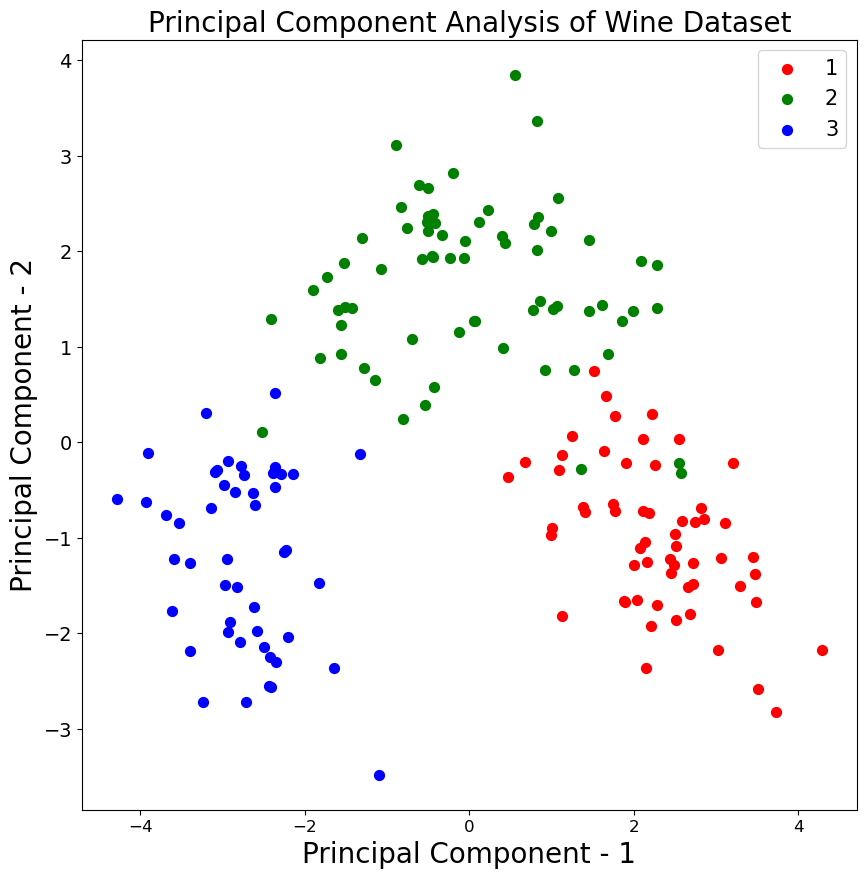

In [17]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Wine Dataset",fontsize=20)
targets = list(np.unique (WineDataQuality))
print(targets)

colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = (WineDataQuality == target)
    plt.scatter(principal_wine_Df.loc[indicesToKeep, 'principal component 1']
               , principal_wine_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [19]:
from sklearn.cluster import KMeans

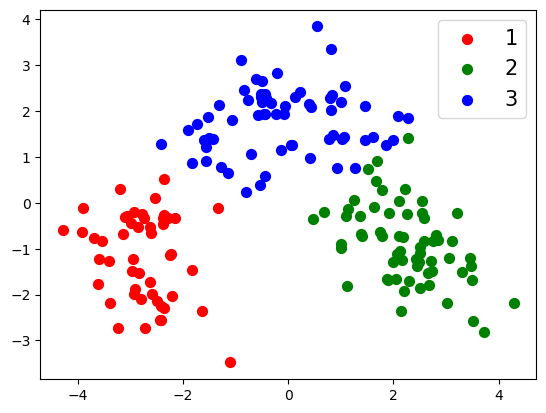

In [20]:
kmeans = KMeans(n_clusters=3).fit(principal_wine_Df)
groups = np.unique ( kmeans.labels_)
for group, color in zip(groups, colors):
    indicesToKeep = (kmeans.labels_ == group)
    plt.scatter(principal_wine_Df.loc[indicesToKeep, 'principal component 1']
               , principal_wine_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')

#for i, l in enumerate(kmeans.labels_):
#    plt.plot(principal_wine_Df[i], principal_wine_Df[i], color=colors[l], marker=markers[l])


In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(WineDataQuality, kmeans.labels_))


pred_label = kmeans.labels_.copy()
#pred_label[kmeans.labels_ == 1] = 1
pred_label[kmeans.labels_ == 0] = 3
#pred_label[kmeans.labels_ == 2] = 3
print( confusion_matrix(WineDataQuality, pred_label) )

[[ 0  0  0  0]
 [ 0 58  0  0]
 [ 1  5 64  0]
 [48  0  0  0]]
[[58  0  0]
 [ 5 64  1]
 [ 0  0 48]]


In [22]:
#myfilename = "/content/drive/MyDrive/Colab Notebooks/MLDM/wineTesting.csv"
#WineTestData = pd.read_csv(myfilename)
WineTestData = pd.read_csv('wineTesting.csv')
#2x13
print(WineTestData)

WineTestDataQuality = WineTestData['Wine']
#WineInput = WineData.loc[:, WineData.columns != 'Wine']
WineTestInput = WineTestData.loc[:, ~WineTestData.columns.isin(['Wine'])]
print(WineTestInput)


   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    13.72        1.43  2.50  16.7  108      3.4        3.67   
1     2    12.04        4.30  2.38  22.0   80      2.1        1.75   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.19     2.04        6.8  0.89  2.87     1285  
1                  0.42     1.35        2.6  0.79  2.57      580  
   Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0    13.72        1.43  2.50  16.7  108      3.4        3.67   
1    12.04        4.30  2.38  22.0   80      2.1        1.75   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.19     2.04        6.8  0.89  2.87     1285  
1                  0.42     1.35        2.6  0.79  2.57      580  


In [16]:
newPCAscores = pca_wine.transform( stdscalar.transform(WineTestInput) )
print(newPCAscores ) 

[[ 3.1197764  -1.77514576]
 [-1.75716015  1.15367569]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


test sample 의 PCA는 서로 수직이 아니다. weight vector 가 train set에 있던 걸 사용했기 때문인듯.

<Figure size 432x288 with 0 Axes>

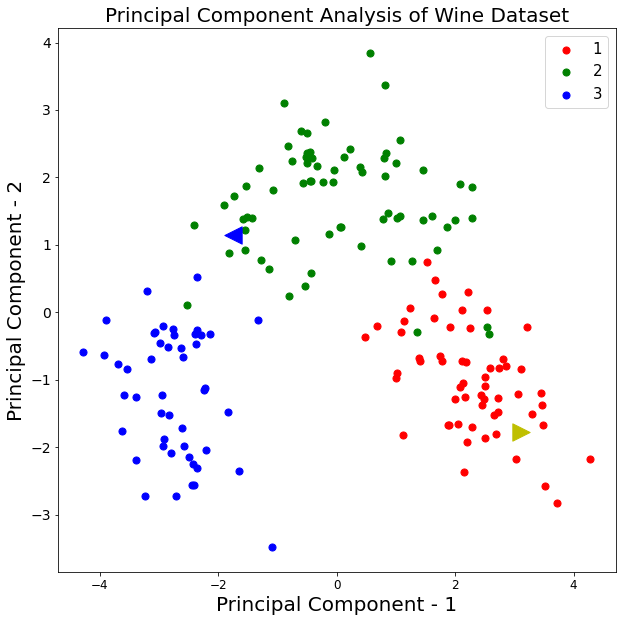

In [17]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Wine Dataset",fontsize=20)
targets = list(np.unique (WineDataQuality))
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = (WineDataQuality == target)
    plt.scatter(principal_wine_Df.loc[indicesToKeep, 'principal component 1']
               , principal_wine_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

plt.scatter(newPCAscores[0,0], newPCAscores[0,1], marker='>', c='y', s=300 )
plt.scatter(newPCAscores[1,0], newPCAscores[1,1], marker='<', c='b', s=300 )